In [6]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [61]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    N = y.shape[0]
    #w = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(tx),tx)),np.transpose(tx)),y)
    #err = y - np.dot(tx,w)
    #mse = np.dot(np.transpose(err),err)/(2*N)
    a = np.dot(np.transpose(tx),tx)
    b = np.dot(np.transpose(tx),y)
    w = np.linalg.solve(a,b)
    # ***************************************************
    
    return w

## 1.2 Grid Search

In [62]:
from grid_search import *
from costs import compute_mse

def use_grid_search(y, tx):
    # Generate the grid of parameters to be swept
    grid_w0, grid_w1 = generate_w(num_intervals=10)

    # Start the grid search
    w = grid_search(y, tx, grid_w0, grid_w1)
    
    mse = w.min()
    a,b = np.where(w == mse)
    w0_min = grid_w0[a]
    w1_min = grid_w1[b]
    w = [w0_min, w1_min]
    return w

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [63]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    w1 = least_squares(y,tx)
    mse1 = compute_mse(y,tx,w1)
    w2 = use_grid_search(y,tx)
    mse2 = compute_mse(y,tx,w2)
    # ***************************************************
    print(mse1)
    print(w1)
    print(mse2)
    print(w2)

Test it here

In [64]:
test_your_least_squares()

15.3858878688
[ 73.293922    13.47971243]
2670863.57063
[array([ 66.66666667]), array([ 16.66666667])]


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [5]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [39]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    poly_x = np.zeros((len(x),degree+1))
    for i in range(degree+1):
        poly_x[:,i] = np.power(x,i)
    return poly_x
    # ***************************************************
    #raise NotImplementedError


Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [65]:
from costs import compute_mse
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        tx = build_poly(x,degree)
        # ***************************************************
        #raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        weights = least_squares(y,tx)
        mse = compute_mse(y,tx,weights)
        rmse = (mse*2)**0.5

        # ***************************************************
        #raise NotImplementedError

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737506
Processing 3th experiment, degree=7, rmse=0.24965870360907372
Processing 4th experiment, degree=12, rmse=0.24328247481248672


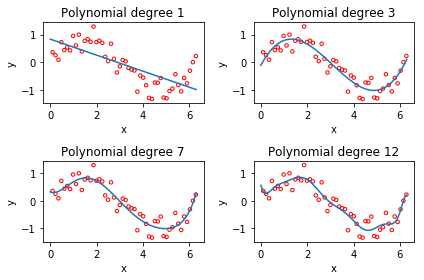

In [66]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [52]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    nTrain = int(ratio * len(x))
    train_x = x[:nTrain]
    train_y = y[:nTrain]
    test_x = x[nTrain:]
    test_y = y[nTrain:]
    return train_x,train_y,test_x,test_y
    #raise NotImplementedError


Then, test your `split_data` function below.

In [69]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    trX, trY, tsX, tsY = split_data(x,y,ratio)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    trx_p = build_poly(trX,degree) #training
    tsx_p = build_poly(tsX,degree) #test
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    weights = least_squares(trY,trx_p)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    rmse_tr = (compute_mse(trY,trx_p,weights)*2)**0.5
    rmse_te = (compute_mse(tsY,tsx_p,weights)*2)**0.5
    # ***************************************************
    #raise NotImplementedError
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [71]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.488, Testing RMSE=0.296
proportion=0.9, degree=3, Training RMSE=0.266, Testing RMSE=0.194
proportion=0.9, degree=7, Training RMSE=0.257, Testing RMSE=0.186
proportion=0.9, degree=12, Training RMSE=0.250, Testing RMSE=0.169
proportion=0.5, degree=1, Training RMSE=0.458, Testing RMSE=0.547
proportion=0.5, degree=3, Training RMSE=0.261, Testing RMSE=0.267
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.313
proportion=0.5, degree=12, Training RMSE=0.173, Testing RMSE=0.395
proportion=0.1, degree=1, Training RMSE=0.597, Testing RMSE=0.497
proportion=0.1, degree=3, Training RMSE=0.027, Testing RMSE=0.447
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=5.309
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=39.964


# 3 Ridge Regression
Please fill in the function below.

In [72]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    M = tx.shape[1]
    I = np.identity(M)
    a = np.dot(np.transpose(tx),tx) + lambda_*I
    b = np.dot(np.transpose(tx),y)
    w = np.linalg.solve(a,b)
    # ***************************************************
    #raise NotImplementedError
    return w

In [73]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    trX, trY, tsX, tsY = split_data(x,y,ratio)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    trX_p = build_poly(trX,degree)
    tsX_p = build_poly(tsX,degree)
    # ***************************************************

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        weights = ridge_regression(trY,trX_p,lambda_)
        rmse_tr_i = (compute_mse(trY,trX_p,weights)*2)**0.5
        rmse_te_i = (compute_mse(tsY,tsX_p,weights)*2)**0.5
        rmse_tr.append(rmse_tr_i)
        rmse_te.append(rmse_te_i)
        # ***************************************************
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

    #raise NotImplementedError


proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.232, Testing RMSE=0.313
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.232, Testing RMSE=0.312
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.232, Testing RMSE=0.311
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.232, Testing RMSE=0.310
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.232, Testing RMSE=0.307
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.233, Testing RMSE=0.301
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.235, Testing RMSE=0.294
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.239, Testing RMSE=0.287
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.243, Testing RMSE=0.281
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.246, Testing RMSE=0.278
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.247, Testing RMSE=0.276
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.248, Testing RMSE=0.275
proportion=0.5, degree=7, lambda=0.193, 

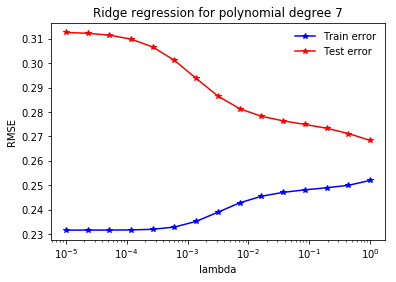

In [74]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)